In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(f'./data/DataCoSupplyChainDataset.csv', delimiter=',', encoding="ISO-8859-1")
desc = pd.read_csv(f'./data/DescriptionDataCoSupplyChain.csv', delimiter=',', encoding="utf-8")
# desc = desc.set_index('FIELDS')

In [3]:
data_meta = pd.DataFrame()
data_meta['Name'] = data.columns.values
data_meta["Unique"] = pd.DataFrame([un for un in data.nunique()])
data_meta["dtype"] = pd.DataFrame([un for un in data.dtypes])

desc_ = desc['DESCRIPTION'].to_list()
desc_.insert(43,"Order Zipcode")
data_meta["Desc"] = pd.DataFrame(desc_)


In [4]:
print("len : ", len(data))
print(data_meta)

len :  180519
                             Name  Unique    dtype  \
0                            Type       4   object   
1        Days for shipping (real)       7    int64   
2   Days for shipment (scheduled)       4    int64   
3               Benefit per order   21998  float64   
4              Sales per customer    2927  float64   
5                 Delivery Status       4   object   
6              Late_delivery_risk       2    int64   
7                     Category Id      51    int64   
8                   Category Name      50   object   
9                   Customer City     563   object   
10               Customer Country       2   object   
11                 Customer Email       1   object   
12                 Customer Fname     782   object   
13                    Customer Id   20652    int64   
14                 Customer Lname    1109   object   
15              Customer Password       1   object   
16               Customer Segment       3   object   
17            

### Frekvencija vrijednosti

In [5]:
# for column in data:
#     print(column, " : ",len(data[column].value_counts()))

### da

<ipython-input-6-50b0b91adf82>:6: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(order_status_d, labels=order_status_i, explode=explode)


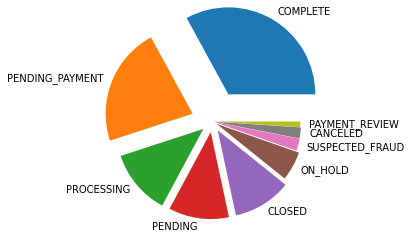

In [6]:
order_status_d = data["Order Status"].value_counts(normalize=True).values
order_status_i = data["Order Status"].value_counts(normalize=True).index.to_list()
explode = [1.1 * idx for idx in order_status_d]

plt.figure(facecolor="white")
plt.pie(order_status_d, labels=order_status_i, explode=explode)
plt.show()

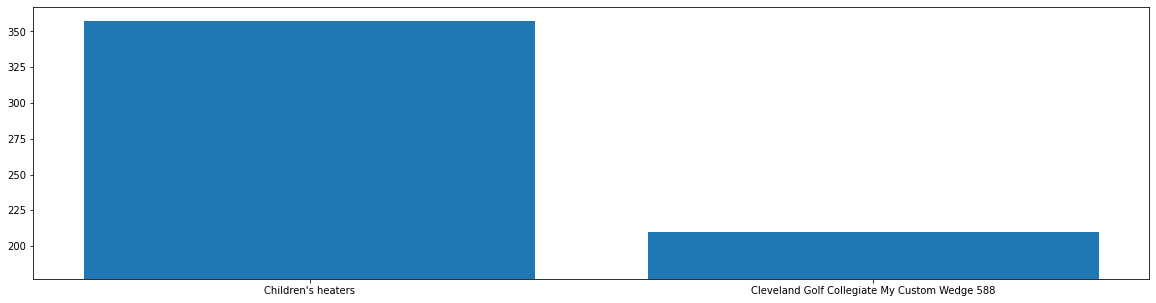

In [7]:
products = data[["Product Name","Product Price"]].groupby("Product Name").first()
# print(products)

products_price_d = products["Product Price"].values
products_price_i = products.index.to_list()

# print(len(products_price_d))
# print(len(products_price_i))
plt.figure(facecolor="white", figsize=(20,5))
plt.bar(products_price_i[11:13], products_price_d[11:13])
plt.ylim(products_price_d[11]-180,products_price_d[11]+10)
plt.show()

In [8]:
type_count = data[["Product Name","Type"]].groupby("Type").count()
name_count = data[["Product Name","Type"]].groupby("Type").count()
print(type_count)

# products_price_d = products["Product Price"].values
# products_price_i = products.index.to_list()
#
# print(len(products_price_d))
# print(len(products_price_i))
# plt.figure(facecolor="white", figsize=(20,5))
# plt.bar(products_price_i[11:13], products_price_d[11:13])
# plt.ylim(products_price_d[11]-180,products_price_d[11]+10)
# plt.show()

          Product Name
Type                  
CASH             19616
DEBIT            69295
PAYMENT          41725
TRANSFER         49883


# Data

- Shipping
- Order
- OrderItem
- Product
- OrderGeo
- ProductCategory


len :  180519
                             Name  Unique    dtype  \
0                            Type       4   object
1        Days for shipping (real)       7    int64
2   Days for shipment (scheduled)       4    int64
3               Benefit per order   21998  float64
4              Sales per customer    2927  float64
5                 Delivery Status       4   object
6              Late_delivery_risk       2    int64
7                     Category Id      51    int64
8                   Category Name      50   object
9                   Customer City     563   object
10               Customer Country       2   object
11                 Customer Email       1   object
12                 Customer Fname     782   object
13                    Customer Id   20652    int64
14                 Customer Lname    1109   object
15              Customer Password       1   object
16               Customer Segment       3   object
17                 Customer State      46   object
18                Customer Street    7458   object
19               Customer Zipcode     995  float64
20                  Department Id      11    int64
21                Department Name      11   object
22                       Latitude   11250  float64
23                      Longitude    4487  float64
24                         Market       5   object
25                     Order City    3597   object
26                  Order Country     164   object

27              Order Customer Id   20652    int64

28        order date (DateOrders)   65752   object

29                       Order Id   65752    int64
30         Order Item Cardprod Id     118    int64
31            Order Item Discount    1017  float64
32       Order Item Discount Rate      18  float64
33                  Order Item Id  180519    int64
34       Order Item Product Price      75  float64
35        Order Item Profit Ratio     162  float64
36            Order Item Quantity       5    int64
37                          Sales     193  float64

38               Order Item Total    2927  float64
39         Order Profit Per Order   21998  float64
40                   Order Region      23   object
41                    Order State    1089   object
42                   Order Status       9   object
43                  Order Zipcode     609  float64

44                Product Card Id     118    int64
45            Product Category Id      51    int64
46            Product Description       0  float64
47                  Product Image     118   object
48                   Product Name     118   object
49                  Product Price      75  float64
50                 Product Status       1    int64

51     shipping date (DateOrders)   63701   object
52                  Shipping Mode       4   object

In [13]:
# data.set_index("Order Item Id", inplace=True)
dataset = data.copy()
dataset.set_index("Order Item Id")

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
Order Item Id,,,,,,,,,,,,,,,,,,,,,
180517,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,2/3/2018 22:56,Standard Class
179254,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/18/2018 12:27,Standard Class
179253,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/17/2018 12:06,Standard Class
179252,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/16/2018 11:45,Standard Class
179251,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.750000,0,1/15/2018 11:24,Standard Class
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65177,CASH,4,4,40.000000,399.980011,Shipping on time,0,45,Fishing,Brooklyn,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 3:40,Standard Class
65161,DEBIT,3,2,-613.770019,395.980011,Late delivery,1,45,Fishing,Bakersfield,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/19/2016 1:34,Second Class
65129,TRANSFER,5,4,141.110001,391.980011,Late delivery,1,45,Fishing,Bristol,...,NaN,1004,45,NaN,http://images.acmesports.sports/Field+%26+Stre...,Field & Stream Sportsman 16 Gun Fire Safe,399.980011,0,1/20/2016 21:00,Standard Class


In [12]:
print(dataset.index)

RangeIndex(start=0, stop=180519, step=1)
